# Pymaceuticals Inc.
---

### Analysis

Out of the 10 drug regimens, Ramicane and Capomulin resulted in the lowest average tumor volume, with Ramicane having slightly more success.

Out of the four isolated drug regimen comparisons – Capomulin, Ramicane, Infubinol, Ceftamin – Infubinol had the highest average tumor volume at the final point in the study and Ramicane had the lowest average tumor volume at the final point in the study.

A positive correlation exists between mouse weight and the average tumor volume – the heavier the weight, the larger the tumor.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_data_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single DataFrame ----combine by mouse ID?
mouse_study_df = pd.merge(study_results, mouse_data, on="Mouse ID", how="left")
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
mouse_count = len(mouse_study_df["Mouse ID"].unique())
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_ID
#g989 is duplicate that we need to drop

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
duplicate_G = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
duplicate_G

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
#need to drop g989 from dataframe
drop_g = mouse_study_df.drop(mouse_study_df.index[[107, 137, 329, 360, 620, 681, 815, 869, 950, 1111, 1195, 1380, 1592]])
drop_g

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
new_count = len(drop_g["Mouse ID"].unique())
new_count

248

In [9]:
#clean dataframe to work with is ms_df
ms_df = drop_g
ms_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [11]:
ms_df["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [12]:
drug_group = ms_df.groupby(["Drug Regimen"])

In [13]:
tumor_mean = drug_group[["Tumor Volume (mm3)"]].mean()

In [14]:
tumor_median = drug_group[["Tumor Volume (mm3)"]].median()

In [15]:
tumor_variance = drug_group[["Tumor Volume (mm3)"]].var()

In [16]:
tumor_stdv = drug_group[["Tumor Volume (mm3)"]].std()

In [17]:
tumor_sem = drug_group[["Tumor Volume (mm3)"]].sem()

In [18]:
#now merge all the dataframes into one dataframe
#combine median into mean
mean_median = pd.merge(tumor_mean, tumor_median, on="Drug Regimen")

In [19]:
#rename xy columns
mean_median_column = {"Tumor Volume (mm3)_x": "Mean Tumor Volume", "Tumor Volume (mm3)_y": "Median Tumor Volume"}
mean_median.rename(columns=mean_median_column, inplace=True)

In [20]:
#combine variance into DF above
mean_median_variance = pd.merge(mean_median, tumor_variance, on="Drug Regimen")

In [21]:
#combine stdv into DF above
mean_median_variance_stdv = pd.merge(mean_median_variance, tumor_stdv, on="Drug Regimen")

In [22]:
#rename xy columns
var_stdv_column = {"Tumor Volume (mm3)_x": "Tumor Volume Variance", "Tumor Volume (mm3)_y": "Tumor Volume Std. Dev."}
mean_median_variance_stdv.rename(columns=var_stdv_column, inplace=True)

In [23]:
#combine sem into DF above
mean_median_variance_stdv_sem = pd.merge(mean_median_variance_stdv, tumor_sem, on="Drug Regimen")

In [24]:
#rename sem columns
sem_column = {"Tumor Volume (mm3)": "Tumor Volume Std. Err."}
mean_median_variance_stdv_sem.rename(columns=sem_column, inplace=True)

In [25]:
summary_stats = mean_median_variance_stdv_sem
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
grouped_drug = ms_df.groupby(["Drug Regimen"])
grouped_drug

In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats= grouped_drug.agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using PANDAS.

In [29]:
time_data = ms_df["Drug Regimen"].value_counts()
time_data

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

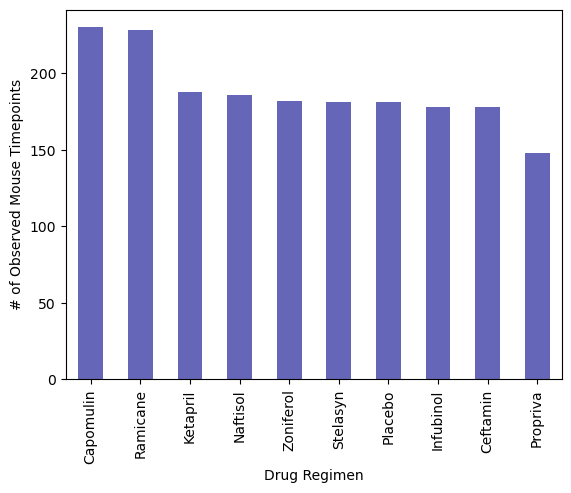

In [30]:
drugs_time_chart = time_data.plot(kind="bar", facecolor='darkblue', alpha = 0.6,
                                 xlabel="Drug Regimen",
                                 ylabel="# of Observed Mouse Timepoints")

drugs_time_chart

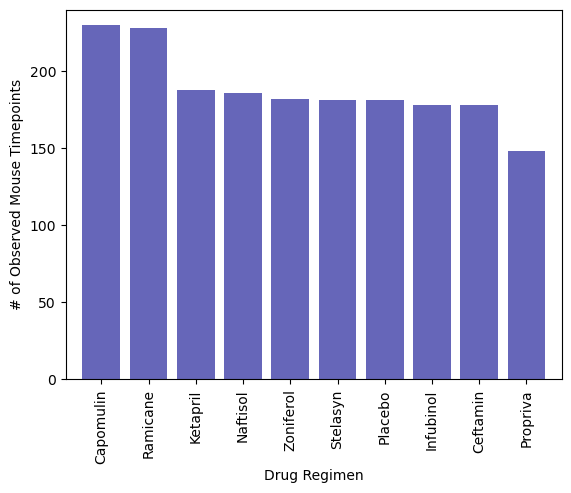

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using PYPLOT.

drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
x_axis = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

ticks = [value for value in x_axis]
plt.xticks(ticks, drugs, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

y_axis = (230, 228, 188, 186, 182, 181, 181, 178, 178, 148)

plt.ylim(0, max(y_axis)+10)

plt.bar(x_axis, y_axis, color='darkblue', alpha=0.6, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS
sex_data = ms_df["Sex"].value_counts()
sex_data


Male      958
Female    922
Name: Sex, dtype: int64

In [33]:
sex_df = pd.DataFrame({"Name": ["Male", "Female"],
                      "Sex": [958, 922]})
sex_df

,Name,Sex
0,Male,958
1,Female,922


<Axes: ylabel='Sex'>

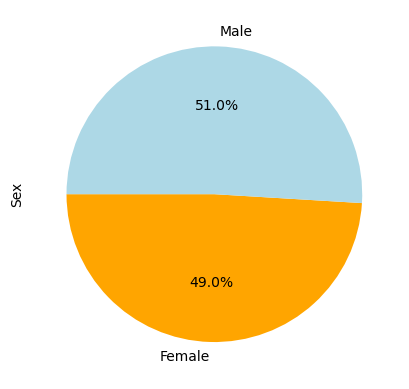

In [34]:
colors=["orange", "lightblue"]
pie = sex_df.groupby(["Name"]).sum().plot(kind='pie', y="Sex", autopct="%1.1f%%", colors=colors, startangle=180, legend=None)
pie

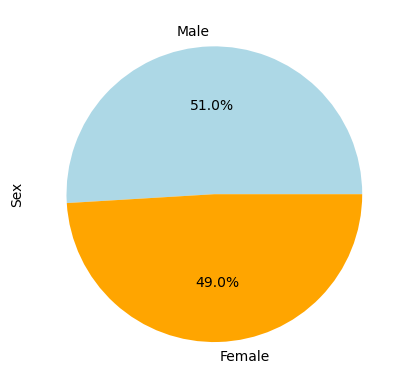

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using PYPLOT
labels = ["Male", "Female"]
count = [958, 922]
colors = ["lightblue", "orange"]
plt.ylabel("Sex")

plt.pie(count, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=0)
plt.show()

In [36]:
ms_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [38]:
grouped_mouse = ms_df.groupby(["Mouse ID"])
grouped_mouse

In [39]:
max_time_mouse = grouped_mouse[["Timepoint"]].max()
max_time_mouse

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [40]:
max_time_df = max_time_mouse.merge(ms_df, on=["Mouse ID", "Timepoint"], how="left")
max_time_df = max_time_df.reset_index(drop=True)
max_time_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. (IQR = Q3 - Q1.....1.5xIRQ rule)
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = max_time_df.loc[max_time_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset (append)
    tumor_volume.append(final_tumor)
    
    # Determine outliers using upper and lower bounds
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25, .5, .75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper-lower
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    
    print(f"{drug} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


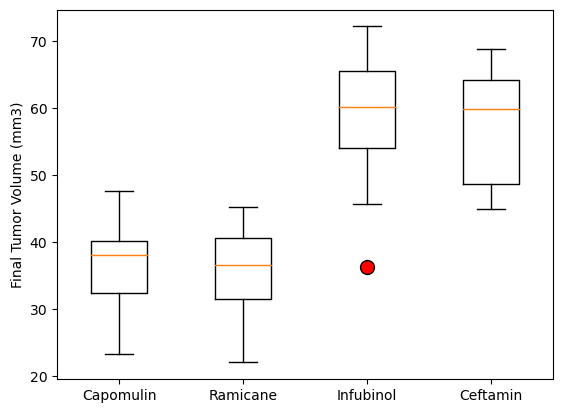

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plops = dict(marker='o', markerfacecolor='red', markersize=10, linestyle='none', markeredgecolor='black')
plt.boxplot(tumor_volume, labels=treatments, flierprops=plops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin...b128
ms_df.loc[ms_df["Mouse ID"].isin(["b128"])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


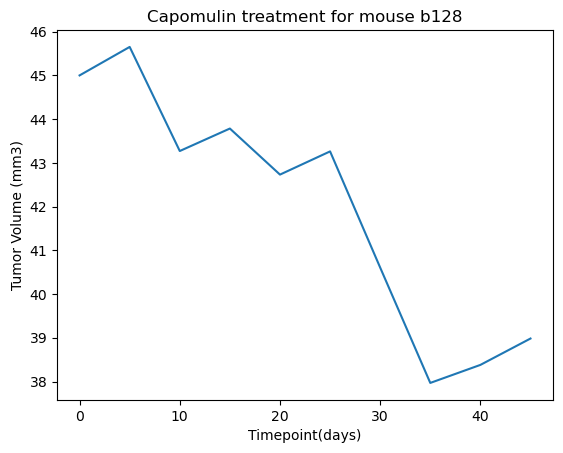

In [44]:
time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
size = [45.000000, 45.651331, 43.270852, 43.784893, 42.731552, 43.262145, 40.605335, 37.967644, 38.379726, 38.982878]

plt.plot (time, size)
plt.title("Capomulin treatment for mouse b128")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [45]:
cap_table = ms_df.loc[ms_df["Drug Regimen"].isin(["Capomulin"])]
cap_table

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [46]:
cap_table["Weight (g)"].unique()

array([22, 21, 17, 15, 23, 25, 20, 19, 24], dtype=int64)

In [47]:
group_weight = cap_table.groupby(["Weight (g)"])
print(group_weight)
group_weight.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months
Weight (g),,,,,,,
15,10,10,10,10,10,10,10
17,65,65,65,65,65,65,65
19,30,30,30,30,30,30,30
20,10,10,10,10,10,10,10
21,48,48,48,48,48,48,48
22,20,20,20,20,20,20,20
23,23,23,23,23,23,23,23
24,10,10,10,10,10,10,10
25,14,14,14,14,14,14,14


In [48]:
avg_tumor = group_weight["Tumor Volume (mm3)"].mean()
avg_tumor

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [49]:
avg_tumor_df = pd.DataFrame({"Weight (g)": [15, 17, 19, 20, 21, 22, 23, 24, 25],
                            "Average Tumor Volume (mm3)": [36.182040, 37.214133, 41.182391, 39.141053, 42.088700, 43.288490, 43.341051, 44.805810, 44.062109]})
avg_tumor_df

,Weight (g),Average Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


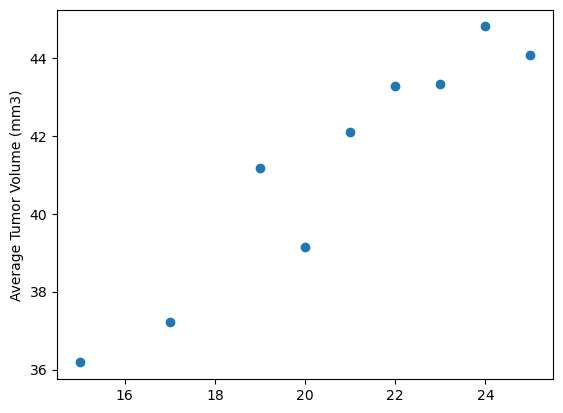

In [50]:
weight = avg_tumor_df["Weight (g)"]
tumor = avg_tumor_df ["Average Tumor Volume (mm3)"]
plt.scatter(weight, tumor)
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation coefficient is 0.95


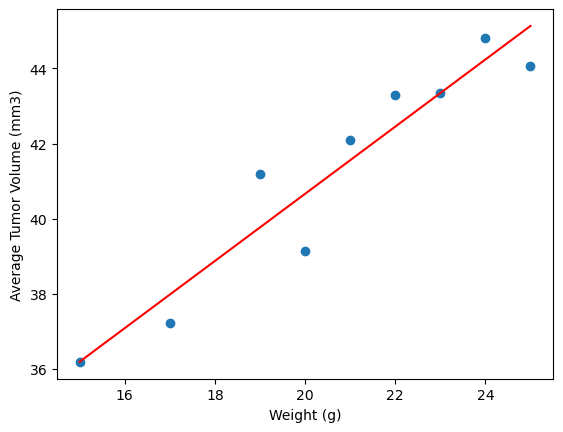

In [51]:
# Calculate the correlation coefficient and a linear regression model 
#coefficient
print(f"The correlation coefficient is {round(st.pearsonr(weight, tumor)[0],2)}")

#linear regression
weight = avg_tumor_df["Weight (g)"]
tumor = avg_tumor_df ["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(5.8, 0.8), fontsize=15, color="red")
plt.show()